# 01_Data_Loading_and_EDA

In [54]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Data into data-frame (df)
df = pd.read_csv('../data/data0.csv', sep=';')

df.columns = df.columns.str.strip() 

# Success Confirmation
print("Loaded data with shape: ", df.shape) 

In [ ]:
# Show the first five rows to verify headers & sample values
df.head()

In [ ]:
# Get data types and non-null counts for every column
df.info()

In [ ]:
# Summary statistics for numeric features
df.describe().T

In [ ]:
# Missing-value counts per column
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

In [ ]:
# Numeric vs. categorical feature lists
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("Numeric columns: ", numeric_cols)
print("Categorical columns: ", categorical_cols)

In [ ]:
# Check target-class balance (if classification)
if 'Target' in df.columns:
    print(df['Target'].value_counts(normalize=True)) # print relative frequence of each class in Target collumn
    sns.countplot(x='Target', data=df)
    plt.title("Target Class Distribution")
    plt.show()

In [ ]:
# Quick visualization of a numeric feature
sample_col = numeric_cols[6] # <- adjust this float according to your needs (max: 35)
df[sample_col].hist(bins=20, figsize=(12,6))
plt.suptitle(f"Histogram of {sample_col}")
plt.tight_layout()
plt.show()

Categorical columns:  ['Target']
Numeric columns:  ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate

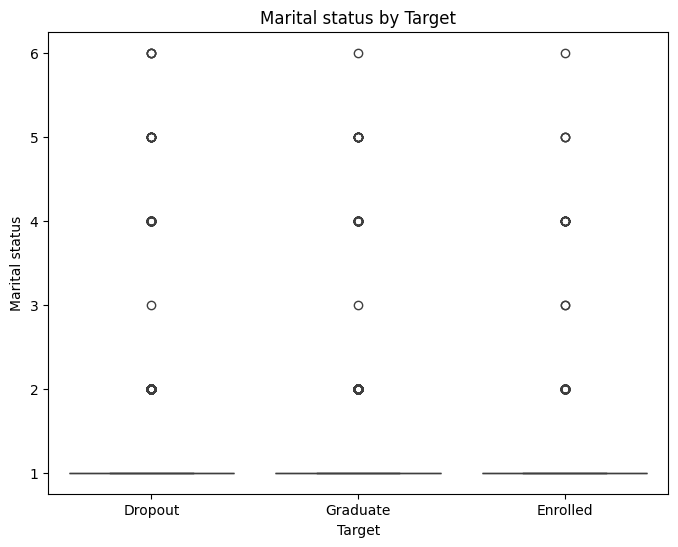

In [68]:
# Dynamic boxplot
x_col = 'Target'
y_col = 'Marital status'

print("Categorical columns: ", categorical_cols)
print("Numeric columns: ", numeric_cols)

plt.figure(figsize=(8, 6))
sns.boxplot(x=x_col, y=y_col, data=df)
plt.title(f"{y_col} by {x_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.show()

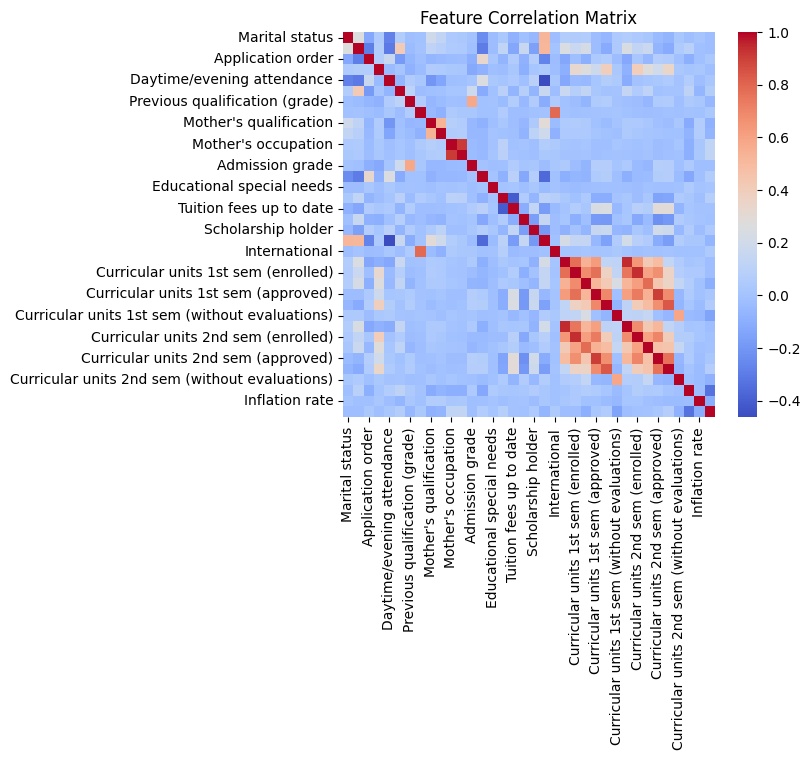

In [65]:
# General HeatMap
corr = df[numeric_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()